# Non-Parametric Bootstrapping

Let's say we have some random variable:
$$x \sim p(\theta)$$
and we're trying to estimate the parameters $\theta$.
The **non-parametric bootstrap** method does this by:
1. $S \subseteq D$, where $D$ is the data and $S$ is some sampled subset of our data, where $|S| = n$; $n \leq N$.
2. Determine some value for $\hat{\theta}_s$ using some function $\delta$; $\hat{\theta}_{s} = \delta(S)$.
3. Repeat Step's (1),(2): $N$-times and collect estimates $\hat{\theta} = \hat{\theta_s}$ for $s = 1, \ldots, N$.
4. We estimate $\theta = \delta(\hat{\theta})$
5. (Optional) Calculate $\sigma[\hat{\theta}]$ for error-margins.

As we increase $n$ and $N$ (the number of subsets we sample from $D$) the estimate gets better.

This has applications in modeling, as this allows us to estimate the varaince of our parameters by using cross-validation and by collecting the parameters for each CV-split.

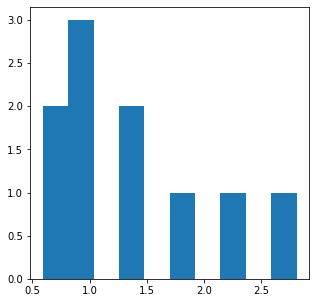

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,5))
np.random.seed(192)
N = 10
true = 1.5
X = np.random.normal(loc = true, scale = 1, size = N)
ax.hist(X)
plt.show()

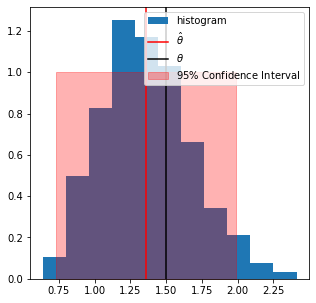

In [2]:
delta = lambda x : np.sum(x) / len(x)

np.random.seed(192)
## This uses a sample mean as the estimate 

def plot_estimate(n, S):
    fig, ax = plt.subplots(figsize = (5,5))
    theta_hat = list()
    for s in range(S):
        x = np.random.choice(X,n)
        theta_hat.append(delta(x))
    theta_est = delta(theta_hat)
    theta_hat = np.array(theta_hat)
    std = np.std(theta_hat)
    ax.hist(theta_hat,label = "histogram",density = True,bins = 1 + round(np.log2(S)))
    ax.axvline(x = theta_est,color = 'r',label = r"$\hat{\theta}$")
    ax.axvline(x = true, color = "black", label = r"$\theta$")
    ax.fill_between(np.linspace(theta_est - 2*std, theta_est+2*std), 1, color = 'r', alpha = 0.3, label = r"$95\%$ Confidence Interval")
    plt.legend()
    plt.show()
plot_estimate(S = 1000, n = 5)


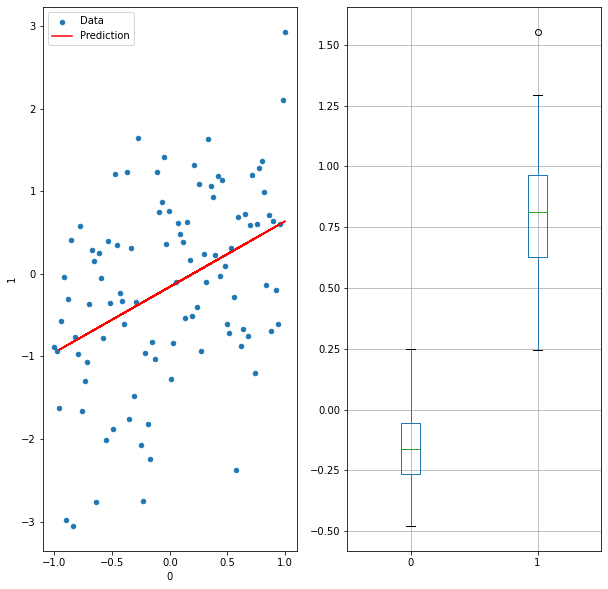

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

fig, ax = plt.subplots(1,2,figsize = (10,10))

N = 100 
S = 100
n = 50
epsilon = np.random.normal(0,1, N)
X = np.linspace(-1,1,N)
Y = X + epsilon
df = pd.DataFrame(np.array([X,Y]).T)
# display(df)
df.plot(x = 0, y = 1,kind = "scatter", ax = ax[0], label = "Data")
theta_hat = list()

for s in range(S):
    index = np.random.choice(df.index, n)
    X,Y = df.iloc[index,[0]],df.iloc[index,1]
    model = LinearRegression().fit(X,Y)
    theta = [np.array(model.intercept_),model.coef_]
    theta_hat.append(theta)
    
theta_0 = np.array([i[0] for i in theta_hat])
theta_1 = np.array([i[1] for i in theta_hat])
ax[0].plot(X, theta_1.mean() * X + theta_0.mean(), color = "red", label = "Prediction")

theta = pd.DataFrame(np.array([theta_0, theta_1.flatten()]).T)
theta.boxplot(ax = ax[1])
ax[0].legend()
plt.show()